In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt

### 최적화 이론
    - 가능한 모든 해 중 최적의 해를 찾는 문제를 해결하는 이론
    - 연속 변수와 불연속 변수에 따라 크게 둘로 나누어짐
    - 부등식 및 등식 제약 조건을 지키면서, 목적 함수가 최소가 되게 하는 x를 찾는 문제.


### Numerical Method : 함수에 대해서 알지 못 할 때, 답을 어떻게 찾는가?
- 무차별 대입법 : 가능한 모든 수를 대입해 보는 방법
    - 최적화에 이용할 수 없는 이유 <br>
        - 최적값이 존재하는 범위를 알아야함 <br>
        - 최적값을 찾기 위해 무한히 촘촘하게 조사해야 함 <br>
        - f(x)의 계산 복잡도가 매우 높음.
    > 적게 대입해 보고 답을 찾을 수는 없을까?

- 경사하강법 : f(x)의 값이 변하지 않을 때 까지 스텝을 반복
    - a(알파) 값이 크거나 작은 경우 범위를 벗어날 수 있으니 적절한 학습률을 선택하는 것은 매우 중요.

- 볼록 함수(Convex function) : 어디서 시작하더라도 경사 하강법으로 최적 값에 도달할 수 있다.

- 비볼록 함수는 시작 위치에 따라 다른 최적 값을 찾는다. 즉, Local-minumum에 빠질 위험이 있다.

- 안장점 (Saddle Point) : 기울기가 0이 되지만 극값이 아닌 지점.
    > 경사 하강법은 안장점에서 벗어나지 못 한다.

- Momentum (관성) : 돌이 굴러 떨어지듯, 이동 벡터를 이용해 이전 기울기에 영향을 받는 알고리즘.
    - 관성을 이용하면 Local minimum과 잡음에 대처할 수 있다.<br>
    - 이동 벡터를 추가로 사용하므로, 경사 하강법 대비 2배의 메모리를 사용한다.

- 적응적 기울기(AdaGrad) : 변수 별로 학습율이 달라지게 조절하는 알고리즘
    - 기울기가 커서 학습이 많이 된 변수는 학습율을 감소시켜, 다른 변수들이 잘 학습되도록 한다.<br>
    - g.t(t번째 step까지의 기울기의 누적 크기)가 계속해서 커져서 학습이 오래 진행되면 더 이상 학습이 이루어지지 않는 단점이 있다.

- RMSProp : AdaGrad의 문제점을 개선한 방법으로, 합 대신 지수평균을 사용
    - 변수 간의 상대적인 학습율 차이는 유지하면서 g.t가 무한정 커지지 않아 오랜 학습 가능.

- Adam : RMSProp과 Momentum의 장점을 결합한 알고리즘

# Gradient Descnet 최적화 구현

### 손실 함수 정의 (Analytic)

In [11]:
def f(x):
    return 0.1 * x ** 4 - 1.5 * x ** 3 + 0.6 * x ** 2 + 1.0 * x + 20.0

### 손실 함수 미분 정의

In [12]:
def df_dx(x):
    return 0.4 * x ** 3 - 4.5 * x ** 2 + 1.2 * x + 1.0

### 하이퍼파라미터 정의

In [13]:
x = 5
eps = 1e-5
lr = 0.01
max_epoch = 1000

### Gradient Descent 알고리즘 구현

In [14]:
min_x = x
min_y = f(min_x)
for _ in range(max_epoch):
    grad = df_dx(x)
    new_x = x - lr * grad
    y = f(new_x)

    if min_y > y:
        min_x = new_x
        min_y = y

    if np.abs(x - new_x) < eps: # x가 변화하는 변화량이 입실론보다 작으면 멈춤.
        break

    x = new_x

In [15]:
print(min_x, min_y)

10.955323272631201 -428.84677390087836


### 시작 위치가 달랐다면? (x가 -5라면?)

In [16]:
x = -5
eps = 1e-5
lr = 0.01
max_epoch = 1000

In [17]:
min_x = x
min_y = f(min_x)
for _ in range(max_epoch):
    grad = df_dx(x)
    new_x = x - lr * grad
    y = f(new_x)

    if min_y > y:
        min_x = new_x
        min_y = y

    if np.abs(x - new_x) < eps: # x가 변화하는 변화량이 입실론보다 작으면 멈춤.
        break

    x = new_x

In [18]:
print(min_x, min_y)

-0.35277896788817237 19.789298288581236


- Gradient Descent로 구한 정답은 그것이 local_minimum인지, global_minumum인지 장담할 수 없음.

### 알고리즘 함수화

In [19]:
def gradient_descent(initial_x, max_epoch=1000, learning_rate=0.01, eps=1e-5):
    x = initial_x    

    x_log = [x] # x들을 변화시킬 때 마다 저장

    min_x = x
    min_y = f(min_x)
    for _ in range(max_epoch):
        grad = df_dx(x)
        new_x = x - lr * grad
        y = f(new_x)

        x_log.append(new_x)

        if min_y > y:
            min_x = new_x
            min_y = y

        if np.abs(x - new_x) < eps: # x가 변화하는 변화량이 입실론보다 작으면 멈춤.
            break

        x = new_x
    return min_x, min_y, x_log

### 알고리즘 결과 시각화

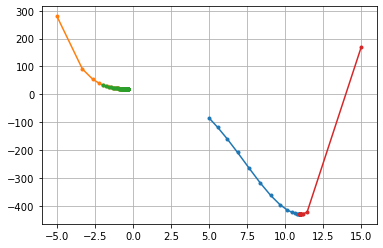

In [30]:
min_x1, min_y1, x_log1 = gradient_descent(initial_x=5)
min_x2, min_y2, x_log2 = gradient_descent(initial_x=-5)
min_x3, min_y3, x_log3 = gradient_descent(initial_x=-2)
min_x4, min_y4, x_log4 = gradient_descent(initial_x=15)

y_log1 = f(np.array(x_log1))
y_log2 = f(np.array(x_log2))
y_log3 = f(np.array(x_log3))
y_log4 = f(np.array(x_log4))

plt.plot(x_log1, y_log1, '.-')
plt.plot(x_log2, y_log2, '.-')
plt.plot(x_log3, y_log3, '.-')
plt.plot(x_log4, y_log4, '.-')
plt.grid()
plt.show()